# MNIST Handwritten Digit Classification

## Prediction

In [1]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model

In [2]:
digit_model = load_model('./mnist-model.h5')

In [3]:
def digit_prediction(img_path):
    img = cv2.imread(img_path)
    grey_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    grey_img = cv2.resize(grey_img,(28,28))
    grey_img = grey_img.reshape(1,28,28,1)
    grey_img = grey_img/255
    prediction = np.argmax(digit_model.predict(grey_img), axis=-1)
    plt.imshow(img)
    print('Number is:',prediction[0])

### Runtime Digit 

Number is: 0


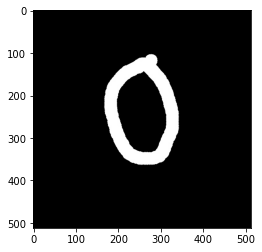

In [9]:
drawing = False

def draw_circle(event,x,y,flags,param):
    global drawing
    
    if event == cv2.EVENT_LBUTTONDOWN:
        drawing = True
        cv2.circle(img,(x,y),15,(255,255,255),-1)
    elif event == cv2.EVENT_MOUSEMOVE:
        if drawing == True:
             cv2.circle(img,(x,y),15,(255,255,255),-1)
    elif event == cv2.EVENT_LBUTTONUP:
        drawing = False
        


img = np.zeros((512,512,3), np.uint8)
cv2.namedWindow(winname='my_drawing')
cv2.setMouseCallback('my_drawing',draw_circle)

while True: 
    cv2.imshow('my_drawing',img)
    if cv2.waitKey(20) & 0xFF == 27:
        cv2.imwrite('my_drawing.jpg',img)
        digit_prediction('./my_drawing.jpg')
        break
        
cv2.destroyAllWindows()